<strong>DSCI 100 Group Project Proposal</strong> <br>
testing title 2 change
Athan Mellios <br>
Aviva Mei <br>
Alvin Zhou <br>
Richard Luo <br>

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:

temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip",temp)

facebook <- read_csv2(unz(temp, "dataset_Facebook.csv"))
head(facebook)
unlink(temp)

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)



Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


<strong>Introduction:</strong> <br>


<strong>Preliminary Exploratory Data Analysis:</strong> <br>

<strong>Methods:</strong> <br>

<strong>Expected outcomes and significance:</strong> <br>

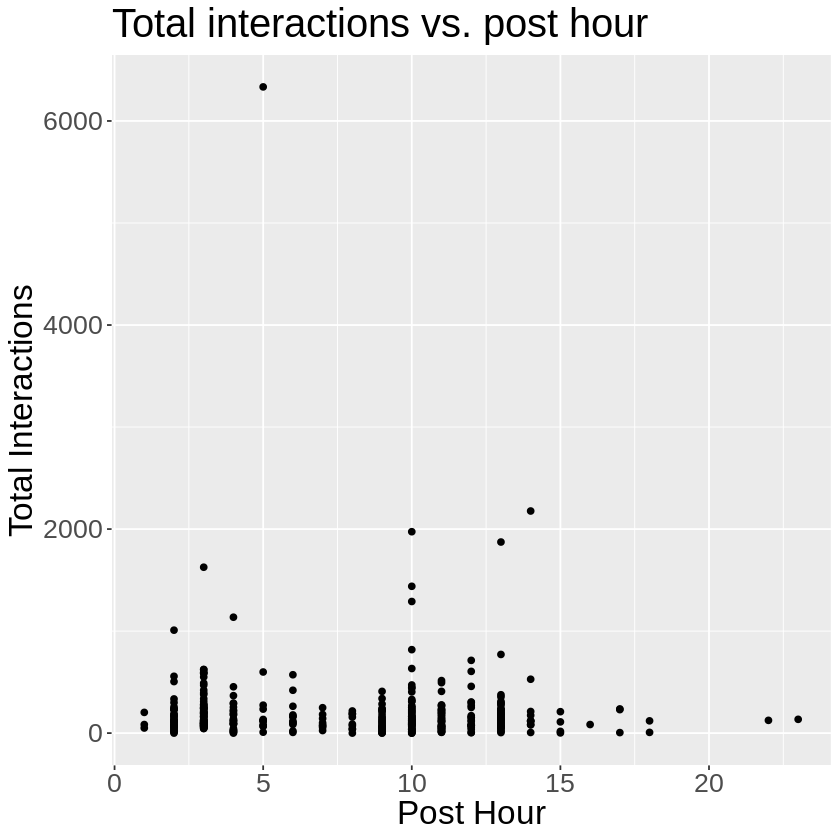

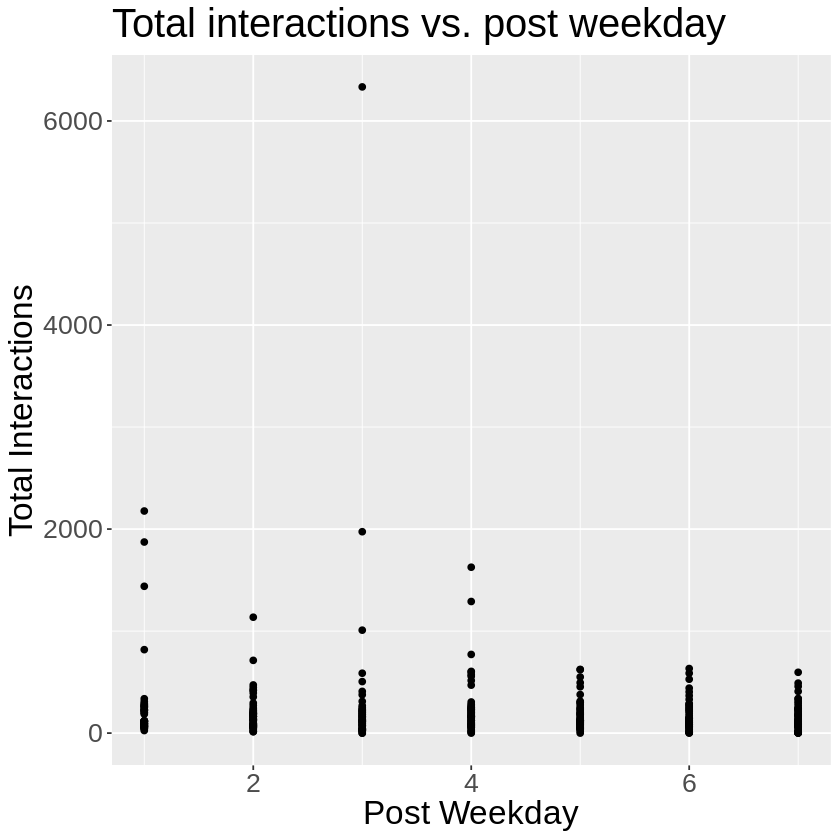

Page total likes,Type,Category,Total Interactions
<dbl>,<chr>,<dbl>,<dbl>
123047,Photo,3,1439
137020,Photo,2,1626
92507,Photo,3,1873
135428,Photo,1,1974
111620,Photo,3,2177
130791,Photo,2,6334


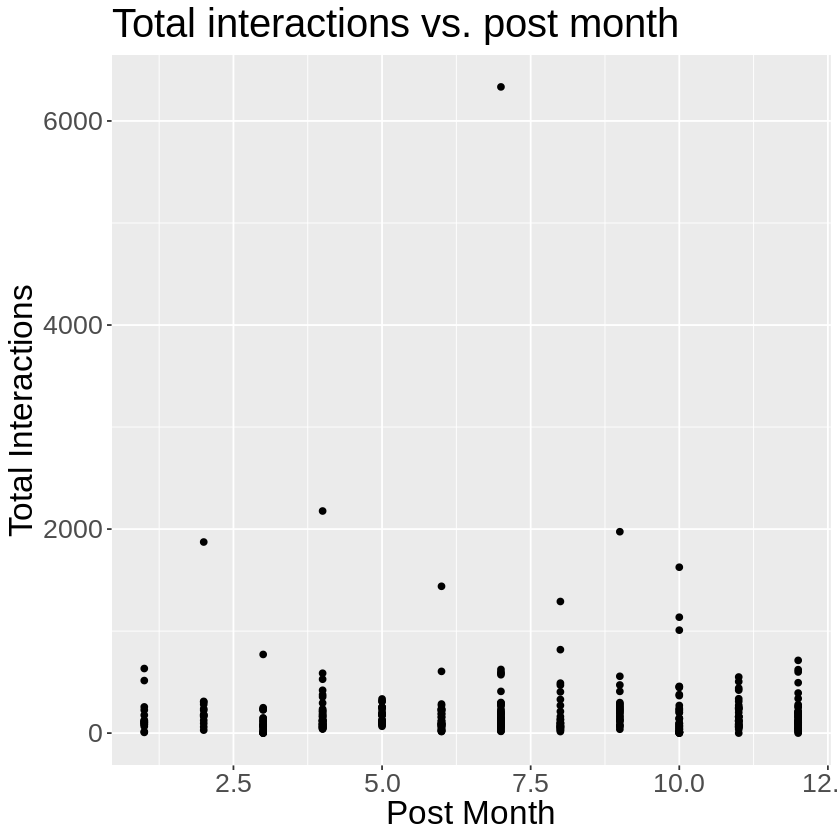

In [7]:
set.seed(1)                      
facebook_split <- initial_split(facebook, prop = 0.75, strata = `Total Interactions`)
facebook_train <- training(facebook_split)
facebook_test <- testing(facebook_split)

facebook_plot = ggplot(data = facebook_train, aes(x = `Post Hour`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total interactions vs. post hour") +
    theme(text = element_text(size = 20))
facebook_plot

facebook_plot2 = ggplot(data = facebook_train, aes(x = `Post Weekday`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total interactions vs. post weekday") +
    theme(text = element_text(size = 20))
facebook_plot2

facebook_plot3 = ggplot(data = facebook_train, aes(x = `Post Month`, y = `Total Interactions`)) +
    geom_point() +
    labs(title = "Total interactions vs. post month") +
    theme(text = element_text(size = 20))
facebook_plot3

fb_test_table = facebook_train %>%
    select(`Page total likes`, Type, Category, `Total Interactions`) %>% 
    arrange(`Total Interactions`)
tail(fb_test_table)